# Titanic Data : Logistic Regression

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder #1-hot encoder (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train_test split
from sklearn.linear_model import LogisticRegression #to call the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score #Crossvalidation

In [ ]:
df_titanic = pd.read_csv('train.csv')

In [ ]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Identify the missing value

`Percent of the missing data in each column if it is`

In [ ]:
df_titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
len(df_titanic)

891

#### %age of missing data

In [ ]:
df_titanic.isna().sum()/len(df_titanic)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


**Takeway from training dataset: Three columns `Age`, `Cabin`, `Embarked` have missing values**

### `Tasks`

1. Drop the `cabin` column from the data as it has 77% missing data
2. Impute `Age` with the average age per `Pclass`
3. Impute `Embarked` with the mode

4. Detailed `EDA on different variables` to understand their relationship

#### Drop the column `Cabin`

In [ ]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Let us also drop `PassengerId` `Name`, `Fare` and `Ticket`

In [ ]:
df_titanic.drop(['PassengerId','Ticket','Name','Fare'],axis=1, inplace=True)

In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Handling the age column - missing records

#### - Impute the ages with the average per Pclass

In [ ]:
def impute_age(col):
    Age = col[0] #to select the column for imputation
    Pclass = col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

In [ ]:
df_titanic_sub = df_titanic[['Age', 'Pclass']]

In [ ]:
df_titanic_sub

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [ ]:
#df_titanic_sub.

SyntaxError: invalid syntax (<ipython-input-129-dbe73c79aaf9>, line 1)

### Imputed missing records in Age as per Pclass

In [ ]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-14-3c1dc44a0733>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0] #to select the column for imputation
<ipython-input-14-3c1dc44a0733>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


In [ ]:
df_titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,2


In [ ]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.00000,1,0,S
1,1,1,female,38.00000,1,0,C
2,1,3,female,26.00000,0,0,S
3,1,1,female,35.00000,1,0,S
4,0,3,male,35.00000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,S
887,1,1,female,19.00000,0,0,S
888,0,3,female,25.14062,1,2,S
889,1,1,male,26.00000,0,0,C


In [ ]:
df_titanic_sub[df_titanic_sub['Pclass']==3]['Age'].mean()

25.14061971830986

### Distribution of  age by Pclass

In [ ]:
sel_pclass = df_titanic_sub['Pclass']==3

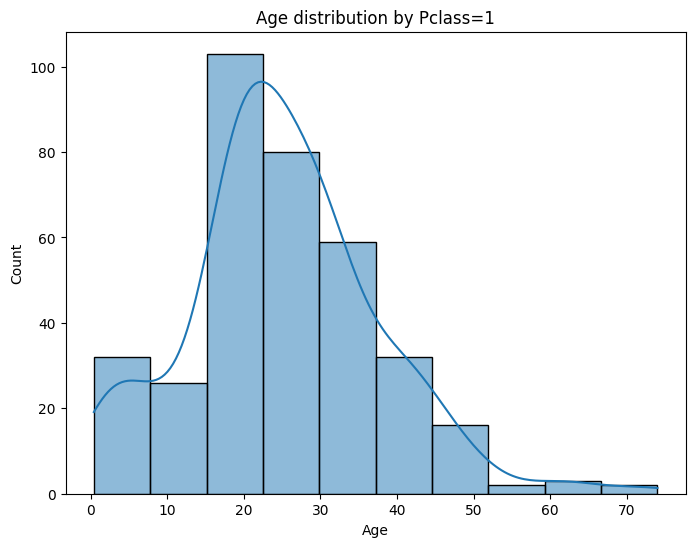

In [ ]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=1')
plt.show()

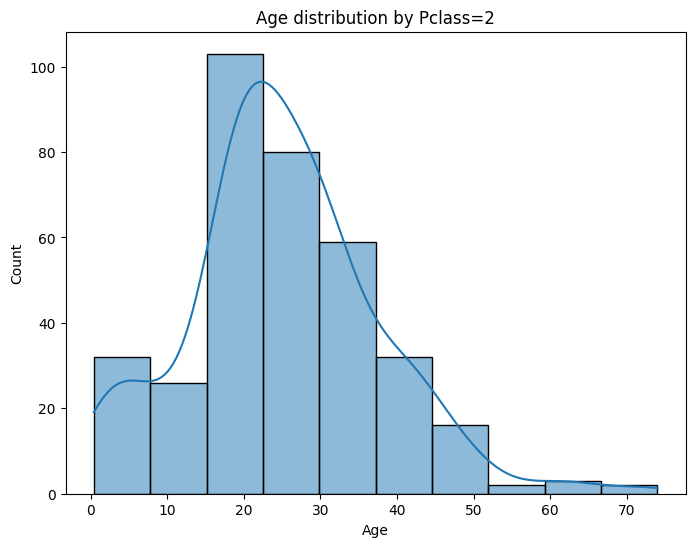

In [ ]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=2')
plt.show()

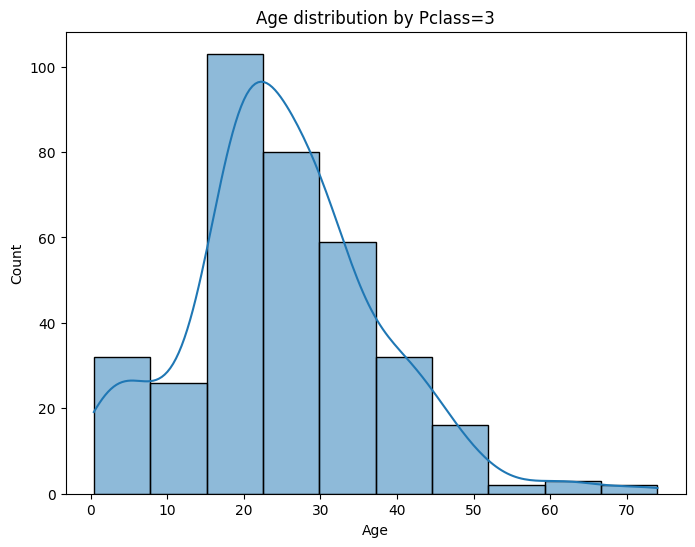

In [ ]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10,kde=True)
plt.title('Age distribution by Pclass=3')
plt.show()

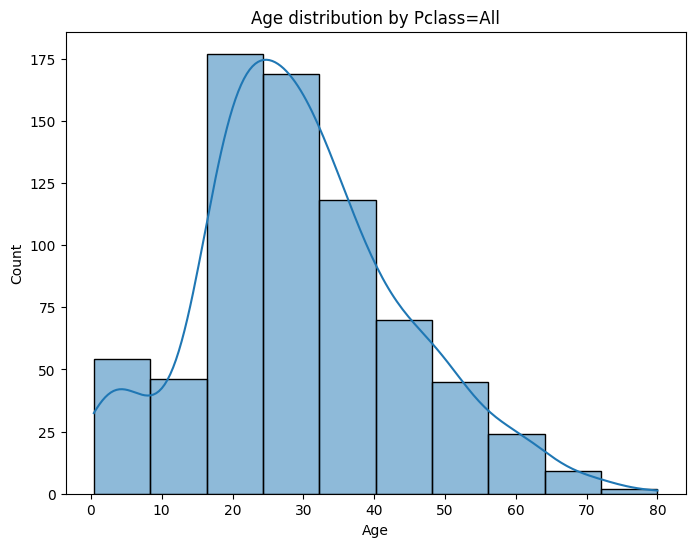

In [ ]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=All')
plt.show()

### Handling the Embarked column

- There are just `two` missing records, we will impute it with the `mode` of the embarked column

In [ ]:
df_titanic['Embarked'].fillna(df_titanic["Embarked"].mode()[0], inplace=True)

In [ ]:
df_titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


In [ ]:
df_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
46,0,3,male,25.14062,1,0,Q
578,0,3,female,25.14062,1,0,C
413,0,2,male,29.87763,0,0,S
880,1,2,female,25.00000,0,1,S
771,0,3,male,48.00000,0,0,S


In [ ]:
df_titanic['Embarked'].mode()[0]

'S'

In [ ]:
df_titanic[df_titanic['Embarked']=="Q"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,25.14062,0,0,Q
16,0,3,male,2.00000,4,1,Q
22,1,3,female,15.00000,0,0,Q
28,1,3,female,25.14062,0,0,Q
32,1,3,female,25.14062,0,0,Q
...,...,...,...,...,...,...,...
790,0,3,male,25.14062,0,0,Q
825,0,3,male,25.14062,0,0,Q
828,1,3,male,25.14062,0,0,Q
885,0,3,female,39.00000,0,5,Q


In [ ]:
df_titanic[df_titanic['Embarked']=="C"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.00000,1,0,C
9,1,2,female,14.00000,1,0,C
19,1,3,female,25.14062,0,0,C
26,0,3,male,25.14062,0,0,C
30,0,1,male,40.00000,0,0,C
...,...,...,...,...,...,...,...
866,1,2,female,27.00000,1,0,C
874,1,2,female,28.00000,1,0,C
875,1,3,female,15.00000,0,0,C
879,1,1,female,56.00000,0,1,C


### Examine the distribution of `Target` column - Survived

#### Plot the count of survived wrt `sex`

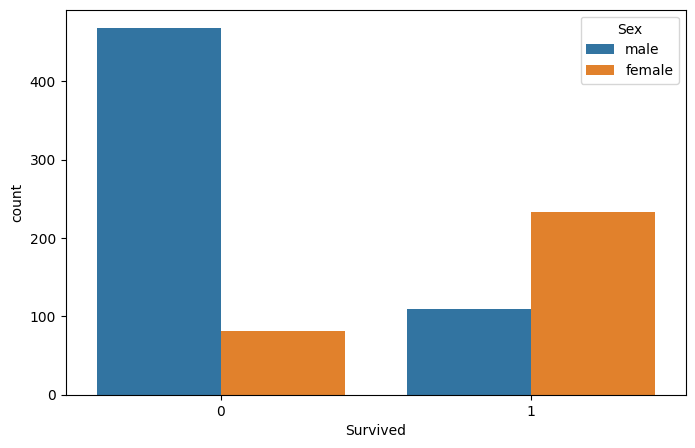

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.show()

#### Observation: `sex` is the one of the key variables for the survival

#### Plot the count of survived wrt `PClass`

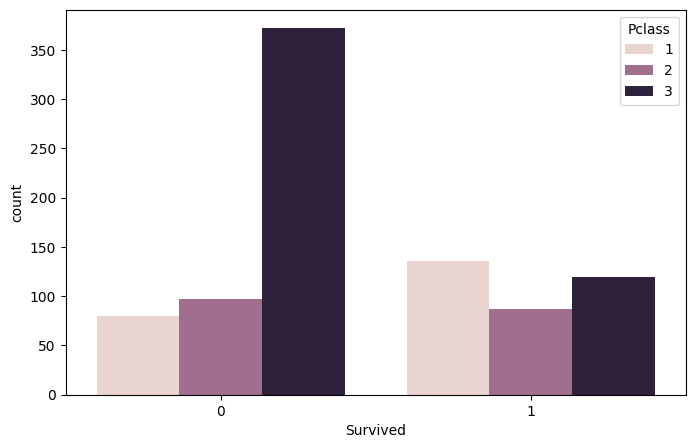

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.show()

#### Observation: `Pclass` is the another key variables for the survival

In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Summary table to show #count (number) of survived or died by Pclass --> Sex

`df_titanic.groupby()`

In [ ]:
df_titanic.groupby(['Survived', 'Pclass', 'Sex']).agg(
Total_count = ('Pclass', 'count')).reset_index()

,Survived,Pclass,Sex,Total_count
0,0,1,female,3
1,0,1,male,77
2,0,2,female,6
3,0,2,male,91
4,0,3,female,72
5,0,3,male,300
6,1,1,female,91
7,1,1,male,45
8,1,2,female,70
9,1,2,male,17


In [ ]:
df_titanic.groupby([ 'Pclass', 'Sex']).agg(
Total_count = ('Pclass', 'count')).reset_index()

,Pclass,Sex,Total_count
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


### Encoding Categorical Variables

- It is the process of converting `categorical data` (represents categories/labels) into a `numerical format` that can be used in ML algos

- A. **Label Encoding**: Assign a unique numerical label to each category. Order of the labels may be arbitrary

    `Example: Category A--> 0, B---> 1, C-->2`
    
- B. **One Hot Encoding**: Creates binary columns for each category. Leads to `high dimensional feature space` - RECOMMENDED!


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


- We have categorical variables such as `Sex`, `Embarked` and `Pclass`

In [ ]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
df_titanic_final = df_titanic

In [ ]:
# del df_titanic_final

In [ ]:
for col in ['Pclass', 'Sex', 'Embarked']:
    df_titanic_final = create_encoding(df_titanic_final,col)

In [ ]:
df_titanic.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
381,1,3,female,1.0,0,2,C
387,1,2,female,36.0,0,0,S


In [ ]:
df_titanic_final.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
436,0,3,female,21.0,2,2,S,False,False,True,True,False,False,False,True
287,0,3,male,22.0,0,0,S,False,False,True,False,True,False,False,True
520,1,1,female,30.0,0,0,S,True,False,False,True,False,False,False,True
262,0,1,male,52.0,1,1,S,True,False,False,False,True,False,False,True
638,0,3,female,41.0,0,5,S,False,False,True,True,False,False,False,True


In [ ]:
df_titanic_final.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
df_titanic_final

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.00000,1,0,False,False,True,False,True,False,False,True
1,1,38.00000,1,0,True,False,False,True,False,True,False,False
2,1,26.00000,0,0,False,False,True,True,False,False,False,True
3,1,35.00000,1,0,True,False,False,True,False,False,False,True
4,0,35.00000,0,0,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,False,True,False,False,True,False,False,True
887,1,19.00000,0,0,True,False,False,True,False,False,False,True
888,0,25.14062,1,2,False,False,True,True,False,False,False,True
889,1,26.00000,0,0,True,False,False,False,True,True,False,False


### Create train and validation sets

In [ ]:
df_titanic_final.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df_titanic_final.sample(2)

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
813,0,6.0,4,2,False,False,True,True,False,False,False,True
27,0,19.0,3,2,True,False,False,False,True,False,False,True


In [ ]:
input_vars = ['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
X = df_titanic_final[input_vars]

In [ ]:
X.sample(2)

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
766,38.233441,0,0,True,False,False,False,True,True,False,False
56,21.000000,0,0,False,True,False,True,False,False,False,True


In [ ]:
y = df_titanic_final['Survived']

In [ ]:
y.sample(2)

,Survived
449,1
621,1


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=45)

In [ ]:
train_X.shape, val_X.shape

((712, 11), (179, 11))

In [ ]:
len(X)

891

In [ ]:
712/891*100

79.91021324354658

### Training the model

In [ ]:
log_reg_model_1 = LogisticRegression() #creating the model object

In [ ]:
log_reg_model_1

LogisticRegression()

In [ ]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

### Validating the model

In [ ]:
pred_values = log_reg_model_1.predict(val_X) #test/validation set

In [ ]:
pred_values #predicted values for survival for validation set

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

### Calculate performance metrics of the model

In [ ]:
acc = accuracy_score(val_y, pred_values)

In [ ]:
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 84.35754189944134


### Plot the confusion matrix using heatmap

#### To calculate the confusion matrix

In [ ]:
cm = confusion_matrix(val_y, pred_values) #predicted vs actual

In [ ]:
cm

array([[102,  15],
       [ 13,  49]])

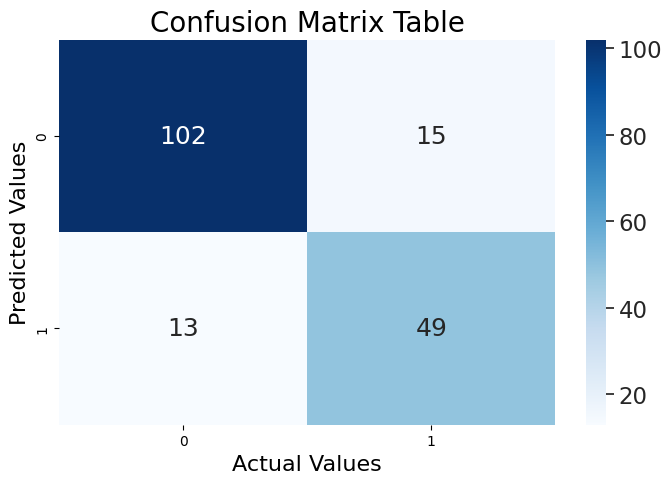

In [ ]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

In [ ]:
(102+49)/(102+49+13+15)*100

84.35754189944134

### Calculate Precision

In [ ]:
prec = precision_score(val_y, pred_values)

In [ ]:
print("Precision for the model is:", prec*100)

Precision for the model is: 76.5625


### Calculate Recall

In [ ]:
recall = recall_score(val_y, pred_values)
print("Recall score for the model is:", recall*100)

Recall score for the model is: 79.03225806451613


### Plot the ROC curve

In [ ]:
fpr, tpr, thresholds = roc_curve(val_y, pred_values)

In [ ]:
fpr

array([0.        , 0.12820513, 1.        ])

In [ ]:
tpr

array([0.        , 0.79032258, 1.        ])

In [ ]:
thresholds

array([inf,  1.,  0.])

In [ ]:
- Thresholds represents the decision boundary being used a binary classifier

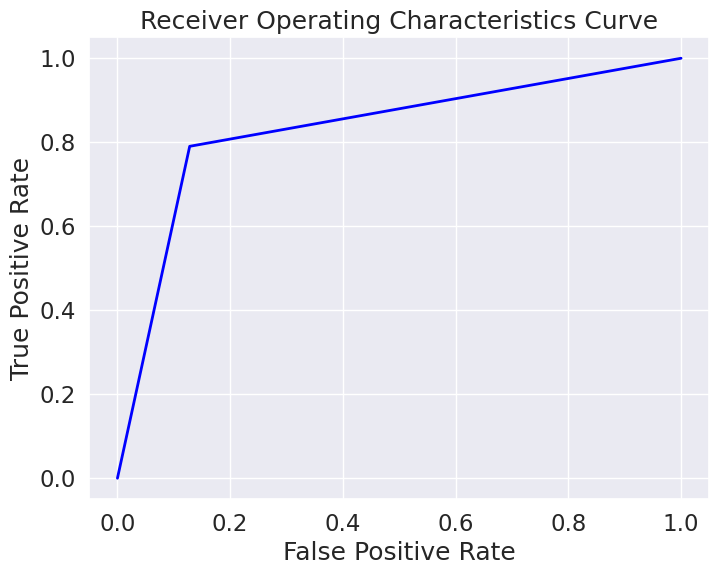

In [ ]:
### Plotting the ROC curve
plt.subplots(figsize=(8,6))

plt.plot(fpr, tpr, color='blue', lw=2,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.show()

In [ ]:
#roc_auc_score